Librerias

In [87]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np 
from math import sqrt 
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

Data

In [88]:
alimentos = pd.read_csv('productos_recomendados.csv').drop('Unnamed: 0', axis=1)
alimentos.drop_duplicates(inplace=True, subset='id_food')

In [89]:
usuarios = pd.read_csv('users.csv').drop('Unnamed: 0', axis=1)

In [90]:
usuarios

,id_food,nutriscore_grade,random_users_id,random_users_ratings
0,38357,e,41,2
1,20435,d,88,3
2,16910,c,47,3
3,33529,b,44,2
4,41750,e,53,2
...,...,...,...,...
45445,51392,a,24,4
45446,51534,b,46,1
45447,51560,c,98,4
45448,51565,b,2,3


In [91]:
alimentos

,id_food,product_name,brands,nutriscore_grade,main_category_en,energy_kcal_100g,fat_100g,saturated_fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,url,supermarket,price,reference_price,reference_unit,medida_similitud
0,38357,crema de cacao con avellana eco veritas 400g,veritas,e,Cocoa and hazelnuts spreads,570.0,36.0,6.0,55.0,52.0,5.0,0.0,https://www.carrefour.es/supermercado/crema-de...,carrefour-es,3.15,7.87,kg,0.880043
1,20435,azucar blanco terrones,azucarera,d,Granulated sugars,400.0,0.0,0.0,100.0,100.0,0.0,0.0,https://www.carrefour.es/supermercado/azucar-b...,carrefour-es,1.45,1.45,kg,0.880044
2,16910,"zumo de pina, mango y maracuya",el frutero,c,Non-Alcoholic beverages,47.0,0.0,0.0,11.0,11.0,0.0,0.0,https://www.carrefour.es/supermercado/zumo-de-...,carrefour-es,3.65,3.65,l,0.880051
3,33529,arroz integral cocido con agua de mar,"natursoy,nutrition & sante iberia s.l.,nutriti...",b,Precooked rices,116.0,2.0,0.0,20.0,1.0,3.0,1.0,https://www.carrefour.es/supermercado/arroz-in...,carrefour-es,1.43,1.43,kg,0.880077
5,41750,chocolate blanco con aove avellanas y trufa,la chinata,e,Chocolates,587.0,42.0,18.0,45.0,42.0,9.0,0.0,https://tienda.mercadona.es/product/12490/choc...,mercadona-es,0.75,7.50,kg,0.880113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28773,51392,brocoli,alteza,a,Frozen broccoli florets,28.0,0.0,0.0,2.0,2.0,3.0,0.0,https://tienda.mercadona.es/product/69580/broc...,mercadona-es,0.95,2.50,kg,1.000000
28795,51534,naranja,alteza,b,es:refrescos,31.0,0.0,0.0,8.0,8.0,0.0,0.0,https://tienda.mercadona.es/product/3235/naran...,mercadona-es,0.40,1.29,kg,1.000000
28814,51560,hogaza sin gluten,mercadona,c,Gluten-free breads,268.0,6.0,1.0,48.0,3.0,4.0,1.0,https://tienda.mercadona.es/product/82735/hoga...,mercadona-es,2.60,8.67,kg,1.000000
28815,51565,naranja,adarve,b,Fruit juices,35.0,0.0,0.0,2.0,2.0,0.0,0.0,https://tienda.mercadona.es/product/3235/naran...,mercadona-es,0.40,1.29,kg,1.000000


Numero de usuarios : 9 
Rating = 1-4 
    1. Malo
    2. Regular 
    3. Bueno 
    4. Excelente 

productos_recomendados de los dos dataframes

In [86]:
df = pd.merge(usuarios, alimentos, on= 'id_food')
df

,id_food,nutriscore_grade_x,random_users_id,random_users_ratings,product_name,brands,nutriscore_grade_y,main_category_en,energy_kcal_100g,fat_100g,...,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,url,supermarket,price,reference_price,reference_unit,medida_similitud
0,38357,e,41,2,crema de cacao con avellana eco veritas 400g,veritas,e,Cocoa and hazelnuts spreads,570.0,36.0,...,55.0,52.0,5.0,0.0,https://www.carrefour.es/supermercado/crema-de...,carrefour-es,3.15,7.87,kg,0.880043
1,38357,e,10,1,crema de cacao con avellana eco veritas 400g,veritas,e,Cocoa and hazelnuts spreads,570.0,36.0,...,55.0,52.0,5.0,0.0,https://www.carrefour.es/supermercado/crema-de...,carrefour-es,3.15,7.87,kg,0.880043
2,38357,e,1,3,crema de cacao con avellana eco veritas 400g,veritas,e,Cocoa and hazelnuts spreads,570.0,36.0,...,55.0,52.0,5.0,0.0,https://www.carrefour.es/supermercado/crema-de...,carrefour-es,3.15,7.87,kg,0.880043
3,38357,e,74,3,crema de cacao con avellana eco veritas 400g,veritas,e,Cocoa and hazelnuts spreads,570.0,36.0,...,55.0,52.0,5.0,0.0,https://www.carrefour.es/supermercado/crema-de...,carrefour-es,3.15,7.87,kg,0.880043
4,38357,e,28,3,crema de cacao con avellana eco veritas 400g,veritas,e,Cocoa and hazelnuts spreads,570.0,36.0,...,55.0,52.0,5.0,0.0,https://www.carrefour.es/supermercado/crema-de...,carrefour-es,3.15,7.87,kg,0.880043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45445,51847,c,57,2,piña,solero,c,Ice creams,382.0,1.0,...,21.0,19.0,1.0,0.0,https://tienda.mercadona.es/product/3125/pina-...,mercadona-es,1.57,0.99,kg,1.000000
45446,51847,c,99,2,piña,solero,c,Ice creams,382.0,1.0,...,21.0,19.0,1.0,0.0,https://tienda.mercadona.es/product/3125/pina-...,mercadona-es,1.57,0.99,kg,1.000000
45447,51847,c,96,3,piña,solero,c,Ice creams,382.0,1.0,...,21.0,19.0,1.0,0.0,https://tienda.mercadona.es/product/3125/pina-...,mercadona-es,1.57,0.99,kg,1.000000
45448,51847,c,1,4,piña,solero,c,Ice creams,382.0,1.0,...,21.0,19.0,1.0,0.0,https://tienda.mercadona.es/product/3125/pina-...,mercadona-es,1.57,0.99,kg,1.000000


Groupby rating & product_name

In [92]:
df.groupby('product_name')['random_users_ratings'].mean().head()

product_name
11 panecillos                   2.833333
3 barras de pan                 3.000000
3 vegetales                     2.833333
4 burgers de pollo              2.166667
5 barras de pan 51% integral    2.000000
Name: random_users_ratings, dtype: float64

In [93]:
df.groupby('product_name')['random_users_ratings'].mean().sort_values(ascending=False)

product_name
ciruelas desecadas sin hueso                       3.833333
patatas bravas micro                               3.833333
porciones de bacalao al punto de sal               3.666667
tinto de verano limon sin alcohol y sin azucar     3.666667
margarina original vegetal con omega sin gluten    3.666667
                                                     ...   
caramelos citricos mix                             1.333333
huevos de chocolate                                1.333333
pechuga de pollo finas hierbas marinada            1.333333
chocolate negro relleno sabor menta                1.250000
danonino sabor fresa                               1.166667
Name: random_users_ratings, Length: 3151, dtype: float64

In [94]:
print(df.keys())

Index(['id_food', 'nutriscore_grade_x', 'random_users_id',
       'random_users_ratings', 'product_name', 'brands', 'nutriscore_grade_y',
       'main_category_en', 'energy_kcal_100g', 'fat_100g',
       'saturated_fat_100g', 'carbohydrates_100g', 'sugars_100g',
       'proteins_100g', 'salt_100g', 'url', 'supermarket', 'price',
       'reference_price', 'reference_unit', 'medida_similitud'],
      dtype='object')


In [95]:
df.rename(columns = {'random_users_id':'userID'}, inplace = True)
df.rename(columns = {'random_users_ratings':'rating'}, inplace = True)

In [96]:
print(df.keys())

Index(['id_food', 'nutriscore_grade_x', 'userID', 'rating', 'product_name',
       'brands', 'nutriscore_grade_y', 'main_category_en', 'energy_kcal_100g',
       'fat_100g', 'saturated_fat_100g', 'carbohydrates_100g', 'sugars_100g',
       'proteins_100g', 'salt_100g', 'url', 'supermarket', 'price',
       'reference_price', 'reference_unit', 'medida_similitud'],
      dtype='object')


In [97]:
user_ids = df["userID"].unique().tolist()
user2user_encoded = {x: i for i, x in enumerate(user_ids)}
userencoded2user = {i: x for i, x in enumerate(user_ids)}
food_ids = df["id_food"].unique().tolist()
food2food_encoded = {x: i for i, x in enumerate(food_ids)}
food_encoded2food = {i: x for i, x in enumerate(food_ids)}
df["user"] = df["userID"].map(user2user_encoded)
df["food"] = df["id_food"].map(food2food_encoded)

num_users = len(user2user_encoded)
num_food = len(food_encoded2food)
df["rating"] = df["rating"].values.astype(np.float32)
# min and max ratings will be used to normalize the ratings later
min_rating = min(df["rating"])
max_rating = max(df["rating"])

In [98]:
print(
    "Number of users: {}, Number of foods: {}, Min rating: {}, Max rating: {}".format(
        num_users, num_food, min_rating, max_rating
    )
)

Number of users: 100, Number of foods: 7575, Min rating: 1.0, Max rating: 4.0


In [99]:
df = df.sample(frac=1, random_state=42)

x = df[["user", "food"]].values
y = df["rating"].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

train_indices = int(0.9 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:],
)

In [100]:
EMBEDDING_SIZE = 50


class RecommenderNet(keras.Model):
    def __init__(self, num_users, num_food, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_food = num_food
        self.embedding_size = embedding_size
        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
        )
        self.user_bias = layers.Embedding(num_users, 1)
        self.food_embedding = layers.Embedding(
            num_food,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
        )
        self.food_bias = layers.Embedding(num_food, 1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        food_vector = self.food_embedding(inputs[:, 1])
        food_bias = self.food_bias(inputs[:, 1])
        dot_user_food = tf.tensordot(user_vector, food_vector, 2)
        # Add all the components (including bias)
        x = dot_user_food + user_bias + food_bias
        # The sigmoid activation forces the rating to between 0 and 1
        return tf.nn.sigmoid(x)


model = RecommenderNet(num_users, num_food, EMBEDDING_SIZE)
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
)

In [101]:
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=64,
    epochs=5,
    verbose=1,
    validation_data=(x_val, y_val),
)

Epoch 1/5
640/640 [==============================] - 4s 5ms/step - loss: 0.6967 - val_loss: 0.6977
Epoch 2/5
640/640 [==============================] - 3s 5ms/step - loss: 0.7162 - val_loss: 0.7009
Epoch 3/5
640/640 [==============================] - 3s 5ms/step - loss: 0.7238 - val_loss: 0.7012
Epoch 4/5
640/640 [==============================] - 3s 5ms/step - loss: 0.7258 - val_loss: 0.7020
Epoch 5/5
640/640 [==============================] - 3s 5ms/step - loss: 0.7075 - val_loss: 0.6987


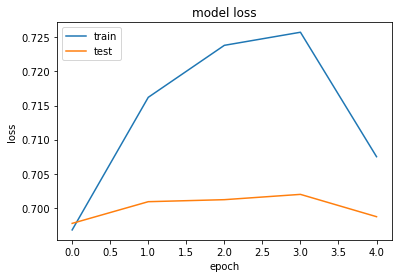

In [102]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

In [119]:
# Let us get a user and see the top recommendations.
user_id = df.userID.sample(1).iloc[0]
foods_rated_by_user = df[df.userID == user_id]
food_not_rated = alimentos[
    ~alimentos["id_food"].isin(foods_rated_by_user.id_food.values)
]["id_food"]
food_not_rated = list(
    set(food_not_rated).intersection(set(food2food_encoded.keys()))
)

food_not_rated = [[food2food_encoded.get(x)] for x in food_not_rated]
user_encoder = user2user_encoded.get(user_id)
user_food_array = np.hstack(
    ([[user_encoder]] * len(food_not_rated), food_not_rated)
)

ratings = model.predict(user_food_array).flatten()
top_ratings_indices = ratings.argsort()[-100:][::-1]
recommended_food_ids = [
    food_encoded2food.get(food_not_rated[x][0]) for x in top_ratings_indices
]

print("Showing recommendations for user: {}".format(user_id))
print("====" * 9)
print("Food with high ratings from user")
print("----" * 8)
top_food_user = (
    foods_rated_by_user.sort_values(by="rating", ascending=False)
    .head(5)
    .id_food.values
)
food_df_rows = alimentos[alimentos["id_food"].isin(top_food_user)]
for row in food_df_rows.itertuples():
    print(row.product_name, ":", row.nutriscore_grade)
    
print("----" * 8)
print("Top food recommendations")
print("----" * 8)
recommended_food = alimentos[alimentos["id_food"].isin(recommended_food_ids)]

rec=[]
for row in recommended_food.itertuples():
    rec.append({'id_food': row.id_food})

rec = pd.DataFrame(rec)
rec

223/223 [==============================] - 0s 980us/step
Showing recommendations for user: 37
Food with high ratings from user
--------------------------------
tarta de manzana : e
maxi york : d
pan de molde espelta integral : a
bebida de arroz y coco : b
callos con garbanzos : b
--------------------------------
Top food recommendations
--------------------------------


,id_food
0,27444
1,23139
2,47147
3,49018
4,15467
...,...
95,4269
96,17799
97,31408
98,39814


In [121]:
productos_recomendados = pd.merge(rec, alimentos, 'inner', on='id_food')


In [122]:
perfil = str(input("Ingrese el perfil deseado entre: A) baja en calorias, B) Volumen, C) Alto rendimiento, D) Balanceado, E) Ahorro "))
perfil = perfil.lower()

In [123]:
if perfil == "a":
  #Perdida de peso
  productos = productos_recomendados.loc[(productos_recomendados.nutriscore_grade.isin(["a","b"])) & (productos_recomendados.energy_kcal_100g <130) & (productos_recomendados.fat_100g<1) & (productos_recomendados.saturated_fat_100g==0)
          & (productos_recomendados.carbohydrates_100g<6) & (productos_recomendados.sugars_100g <5) & (productos_recomendados.salt_100g<=1)]
elif perfil == "b":
  #Perdida de peso
  productos = productos_recomendados.loc[(productos_recomendados.nutriscore_grade.isin(["a","b","c","d"])) & (productos_recomendados.fat_100g<3) & (productos_recomendados.saturated_fat_100g<=1)
          & (productos_recomendados.sugars_100g <10) & (productos_recomendados.salt_100g<=1)].sort_values(by='proteins_100g', ascending=False)

elif perfil == "c":
  #Alto Rendimiento
  productos = productos_recomendados.loc[(productos_recomendados.nutriscore_grade.isin(["a","b","c"])) & (productos_recomendados.fat_100g<3) & (productos_recomendados.saturated_fat_100g<=1)
           ].sort_values(by= ['energy_kcal_100g','sugars_100g','carbohydrates_100g'],ascending=False)

elif perfil == "d":
 #Balanceado
  productos = productos_recomendados.loc[(productos_recomendados.nutriscore_grade.isin(["a","b","c","d"])) & (productos_recomendados.energy_kcal_100g <86) & (productos_recomendados.fat_100g<1) & (productos_recomendados.saturated_fat_100g==0)
          & (productos_recomendados.carbohydrates_100g<6) & (productos_recomendados.proteins_100g <4) & (productos_recomendados.salt_100g<=1) & (productos_recomendados.price <=2)].sort_values(by=['price'])

else:
  #Ahorro
  productos = productos_recomendados.loc[(productos_recomendados.energy_kcal_100g <245) & (productos_recomendados.fat_100g<3) & (productos_recomendados.saturated_fat_100g<=1)
          & (productos_recomendados.carbohydrates_100g<28) & (productos_recomendados.proteins_100g <12) & (productos_recomendados.salt_100g<=1)].sort_values(by=['price'])


productos

,id_food,product_name,brands,nutriscore_grade,main_category_en,energy_kcal_100g,fat_100g,saturated_fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,url,supermarket,price,reference_price,reference_unit,medida_similitud
96,17799,limon,la casera,b,es:refrescos,2.0,0.0,0.0,0.0,0.0,0.0,0.0,https://tienda.mercadona.es/product/3210/limon...,mercadona-es,0.32,1.69,kg,1.000000
18,24901,cerveza sin alcohol,estrella de levante,c,Non-alcoholic beers,20.0,0.0,0.0,5.0,2.0,0.0,0.0,https://tienda.mercadona.es/product/27136/cerv...,mercadona-es,0.68,2.06,l,0.888876
37,19498,coles de bruselas,gvtarra,a,Canned Brussels sprouts,27.0,0.0,0.0,4.0,1.0,2.0,1.0,https://www.carrefour.es/supermercado/coles-de...,carrefour-es,0.79,1.76,kg,0.900000
97,31408,endibias,vegaduero,a,Belgian endives,15.0,0.0,0.0,1.0,0.0,2.0,0.0,https://tienda.mercadona.es/product/69591/endi...,mercadona-es,1.42,2.84,kg,1.000000
80,30865,champiñon laminado,unide,a,Champignon mushrooms,18.0,0.0,0.0,1.0,0.0,2.0,1.0,https://tienda.mercadona.es/product/69519/cham...,mercadona-es,1.60,5.00,kg,0.944000
0,27444,agua mineral natural manantial de solares,aro,b,Beverages,0.0,0.0,0.0,0.0,0.0,0.0,0.0,https://www.carrefour.es/supermercado/agua-min...,carrefour-es,1.86,1.86,l,0.881003
39,50587,tomates,dia,a,Tomatoes,18.0,0.0,0.0,4.0,3.0,1.0,0.0,https://tienda.mercadona.es/product/69976/toma...,mercadona-es,1.99,1.99,kg,0.900000
